In [1]:
%matplotlib ipympl
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import genlaguerre    #genlaguerre(n, alpha)
import matplotlib as mpl

from matplotlib.lines import Line2D
import ipywidgets as widgets
from matplotlib.pyplot import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.ndimage

In [2]:
W = 1.5 #um(10**-6m)

def Factorial(n):
    f=1
    for i in range(1,n+1,1):
        f*=i 
    return f

def Laguerre(rho,l,p):
    l = np.abs(l)
    L = 0
    for m in range(p+1):
        L += (-1)**m * Factorial(l+p) / (Factorial(p-m)*Factorial(l+m)*Factorial(m)) * (2*(rho/W)**2)**m
    return L

def f(rho,l,p):
    l = np.abs(l)
    f = np.sqrt((Factorial(p)*2)/(np.pi*Factorial(l+p))) * np.exp(-(rho/W)**2) * (np.sqrt(2)*rho/W)**l * Laguerre(rho,l,p)
    return f 
    
# def u(phi,rho,l,p):
#     u = f(rho,l,p) * np.exp(complex(0,1)*l*phi)
#     return u

# def ux(phi,rho,l1,l2,p,beta,alpha):
#     ux = (1*np.cos(beta/2)*u(phi,rho,l1,p) +1*np.exp(complex(0,1)*alpha)*np.sin(beta/2)*u(phi,rho,l2,p) )/np.sqrt(2)
#     return ux

# def uy(phi,rho,sigma1,sigma2,l1,l2,p,beta,alpha):
#     uy = complex(0,1)*( sigma1*np.cos(beta/2)*u(phi,rho,l1,p)  +sigma2*np.exp(complex(0,1)*alpha)*np.sin(beta/2)*u(phi,rho,l2,p) )/np.sqrt(2)  
#     return uy

# def uintensity(phi,rho,sigma1,sigma2,l1,l2,p,beta,alpha):
#     uin = np.sqrt( np.abs(ux(phi,rho,l1,l2,p,beta,alpha))**2 + np.abs(uy(phi,rho,sigma1,sigma2,l1,l2,p,beta,alpha))**2 )
#     return uin

In [3]:
#數值設定  
c = 299792458 #m/s
Eg = 1.7 #eV
D_B = 1.89 * 10**(-20) #um*C
D_G = 0.12 * 10**(-20) #um*C
a_0 = 1 #V*s
ZR = 11.81 #um
W = 1.5 #umz
Q_c = 8.6 #um^-1
q = 2*ZR/(W**2) #um-1
w = c*q*10**(-6)
hbar = 6.582119569 * 10**(-16) #eV*s
print("q=",q,"um-1$ \nw=",w,"s^-1 \nLamda=",2*np.pi/q,"um")

q= 10.497777777777777 um-1$ 
w= 3147.154603537778 s^-1 
Lamda= 0.5985252726991562 um


# Bessel Function

In [4]:
# l 
# q
# rho
# number 總共sum項數
def B(l, q, rho, number):
    l = np.abs(l)
    B = 0
    for i in range(0,number+1,1):
        B = B + (-(q*rho)**2/4)**i / (Factorial(i)*Factorial(l+i))
        # B += rho / Factorial(i)
        
    B *= (q*rho/2)**l
    return B

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


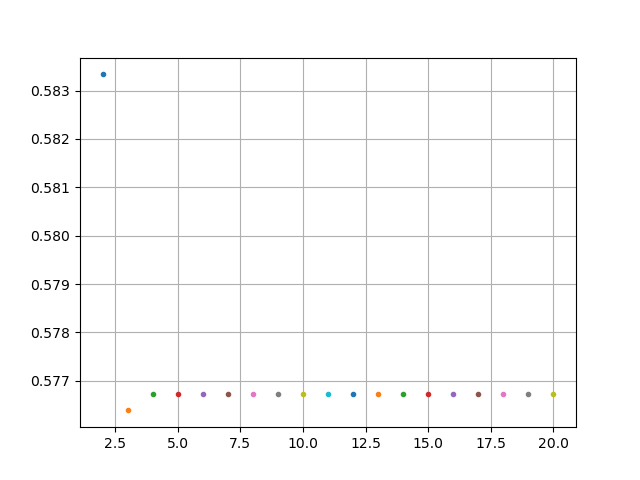

In [10]:
#Bessel Function不同number數收斂形式 

fig, ax = plt.subplots()

number = 1
for i in range(1,20,1):
    number += 1
    print(number)
    ax.plot( number, B(l=1, q=0.5, rho=4, number=number ), '.' )

# ax.set_ylim(0.348, 0.350)
ax.grid()

plt.show()

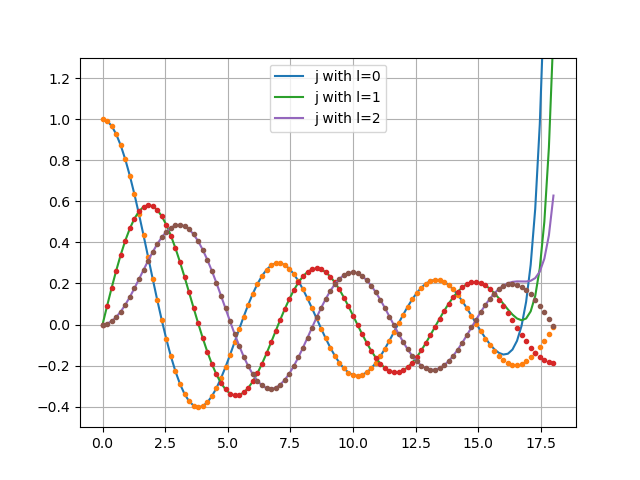

In [25]:
#SUM 20項已差不多

fig, ax = plt.subplots()

rho = np.linspace(0,18,100)

for i in range(3):
    ax.plot( rho, B(i, 1, rho, 20 ) ,label=f'j with l={i}')
    ax.plot( rho, B(i, 1, rho, 90 ), '.')


ax.legend()
ax.grid()
ax.set_ylim(-0.5, 1.3)
plt.show()

# Hankel Transform

In [26]:
#辛普森積分法

# l
# q
# rho

def fun(q,rho,l,p):
        y = rho*B(l,q,rho,20)*f(rho,l,p)
        return y

def H(q,l,p, h):
    # h = np.power(0.1,3)
    max = 4
    min = 0
    
    sim = 0
    rho = min+h/2
    while (rho<max):
        sim += h/6 * (fun(q, rho-h/2, l, p)+4*fun(q, rho, l, p)+fun(q, rho+h/2, l, p))
        rho += h

    return sim

0.3
0.6
0.8999999999999999
1.2
1.5
1.8
2.1
2.4
2.6999999999999997
2.9999999999999996
3.2999999999999994
3.599999999999999


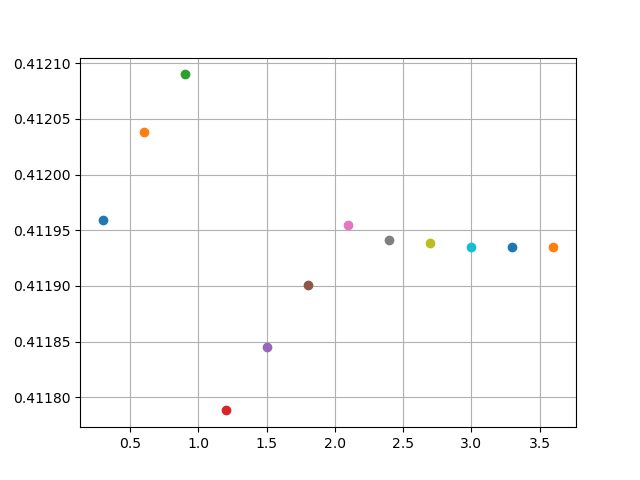

In [28]:
#改變積分間距 h

fig, ax = plt.subplots()

number = 0
for i in range(1,13,1):
    number += 0.3
    print(number)
    h = np.power(0.1, number)
    ax.plot( number, H(0.5,1,0,h), 'o' )

ax.grid()

plt.show()

1
2
3
4
5


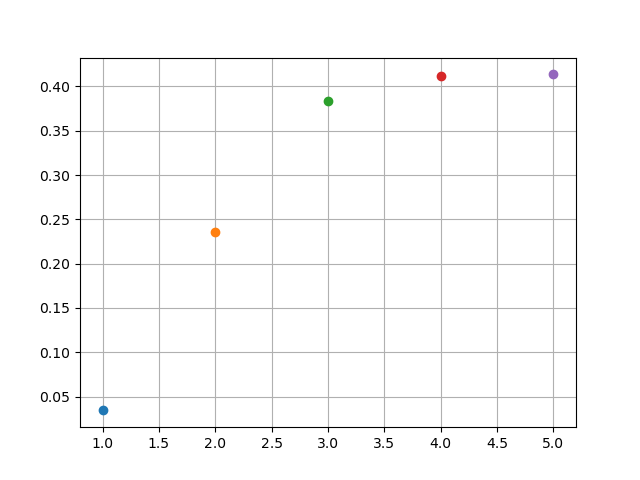

In [29]:
#固定間格h、改變積分範圍 rho

def Hex(q,l,p, h ,max):
    min = 0
    
    sim = 0
    rho = min+h/2
    while (rho<max):
        sim += h/6 * (fun(q, rho-h/2, l, p)+4*fun(q, rho, l, p)+fun(q, rho+h/2, l, p))
        rho += h

    return sim

fig, ax = plt.subplots()

number = 0
for i in range(1,13,1):
    number += 1
    print(number)
    h = np.power(0.1, 3)  #number = 3
    ax.plot( number, Hex(0.5,1,0,h,number), 'o' )

ax.grid()

plt.show()

In [45]:
# F = 2 pi H[f] e^(i l phiq)

def F(q,l,p):
    F = H(q,l,p,np.power(0.1,2)) 
    return F

# F(phiq,q,l,p) = F(phiq,q,l,p)* np.exp(complex(0,1)*l*phiq)

In [47]:
def returnfun(rho,q,l,p):
        y = q*B(l,q,rho,20)*F(q,l,p)
        return y

def returnH(rho,l,p, h):
    # h = np.power(0.1,3)
    max = 4
    min = 0
    
    sim = 0
    rho = min+h/2
    while (rho<max):
        sim += h/6 * (returnfun(rho, q-h/2, l, p)+4*returnfun(rho, q, l, p)+returnfun(rho, q+h/2, l, p))
        rho += h

    return sim

In [48]:
def difference(rho,l,p):
    ER = f(rho,l,p) - returnH(rho,l,p,np.power(0.1,2)) 
    return ER


Output()

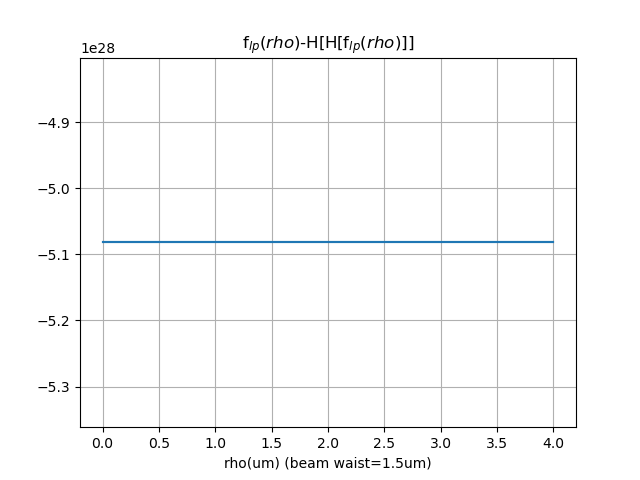

In [49]:
l = widgets.IntText(value=1, min=0, max=10, step=1, description='l:', disabled=False)
p = widgets.IntText(value=0, min=0, max=10, step=1, description='p:', disabled=False)

rho = np.linspace(0, 4, 100)

fig, ax = plt.subplots()
def differ(l, p):
    ax.set_title('f$_{lp}(rho)$-H[H[f$_{lp}(rho)$]]')
    ax.plot(rho, np.real(difference(rho,l,p)), color='#1f77b4')
    # ax.plot(-rho, np.real(difference(rho,l,p)), color='#1f77b4')
    
    ax.plot(rho, np.real(difference(rho,l,p)), color='#1f77b4')
    ax.grid()
    ax.set_xlabel("rho(um) (beam waist=1.5um)")

#滑桿控制 
out3D = widgets.interactive_output(differ, {'l':l, 'p':p })
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.HBox([l,p])])
display(ui , out3D)